In [1]:
import sys
sys.executable

'C:\\Users\\madha\\.conda\\envs\\pymc_env\\python.exe'

In [2]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'png'
matplotlib.rcParams['figure.dpi'] = 100
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import odeint
import numpy as np
from scipy import integrate, optimize
import pandas as pd 

### Solving a initial value probem
$$y'(t) = b +  y t, \quad y(0) = 1.0$$


#### Step-1: Define equation

In [3]:
def dydt_fun(y,t,b):# remember the seq.
    dydt = b + y*t 
    return dydt 

#### Step-2: Set parameter value and Initial condition

In [4]:
b = 11.0 # parameter
y0 = 1.0 #initial value

#### Step-3: Set the time span

In [5]:
t0 = 0.0 #starting time
tnd = 5 # ending time
NoP = 50 # number of points
tspan = np.linspace(t0, tnd, NoP)

#### Step-4: Solve the ODE

In [6]:
y = odeint(dydt_fun, y0, tspan, args=(b,))  #in args=(b,)  ',' is important
y.shape

(50, 1)

#### Step-5: Plot solution

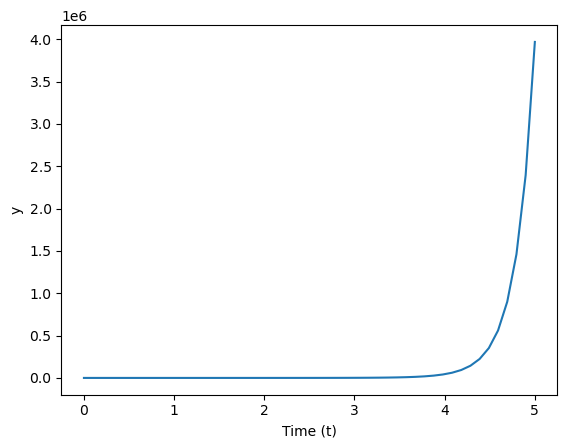

In [7]:
plt.plot(tspan,y) 
plt.xlabel("Time (t)") 
plt.ylabel("y") 
plt.show()

## SIR model differential equations
$$\begin{equation*}
\left\lbrace
\begin{aligned}
S'(t)  &= -\beta \frac{I}{N}S, \quad S(0)  = S_0\\
I'(t)  &=  \beta \frac{I}{N}S - \gamma I, \quad I(0) = I_0\\
R'(t)  &= \gamma I, \quad R(0) = R_0
\end{aligned}
\right.
\end{equation*}
$$

In [8]:
def SIR_ode(y, t, param): # remember the pattern (y,t,param)
    S, I, R = y # split the states
    N, beta, gamma = param # split the parameters
    dSdt = - beta * S * I / N  # susceptible equation
    dIdt =   beta * S * I / N - gamma * I  # infected equation
    dRdt =  gamma * I  # recovered equation
    return [dSdt, dIdt, dRdt]

### Set the model parameter values

In [9]:
beta = 0.5 # infection rate
gamma = 0.25 # recover rate

### Basic reproduction number 
$$\mathcal{R}_0  = \frac{\beta}{\gamma}$$

In [10]:
Reprod = beta/gamma
print(f"Basic reproduction number is {Reprod}, which is greater than 1.")

Basic reproduction number is 2.0, which is greater than 1.


### Initial conditions

In [11]:
N = 1000.0 # total initial population
I0 = 10.0 #initial infection individual
R0 = 0.0  #initial recovered individual
S0 = N - (I0 + R0)  #initial susceptible individual
Init_sir = [S0, I0, R0]  

In [12]:
param_sir  = [N, beta, gamma] #parameter set
t_0 = 0.0 # start time
t_end = 100.0 # end time
tspan = np.linspace(0, 100, 101) # time span with 101 points
soln_sir = odeint(SIR_ode, Init_sir, tspan, args=(param_sir,)) # solving with odeint

In [13]:
soln_sir.shape #dimension

(101, 3)

In [14]:
S_sir, I_sir, R_sir = soln_sir.T 

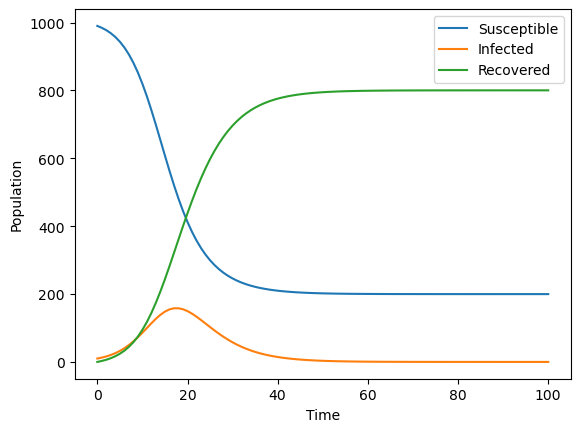

In [15]:
plt.Figure(figsize=(20,10))
plt.plot(tspan, S_sir, label="Susceptible")
plt.plot(tspan, I_sir, label="Infected")
plt.plot(tspan, R_sir, label="Recovered")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()

### Preventing outbreak
Condition: $p > 1 - \dfrac{1}{\mathcal{R}_0}$, where $p$ is the portion of vaccination

In [16]:
Tmp = 1 - 1/Reprod  # RHS of  the cond.
print(f' The value of Tmp is  {Tmp}')
p = 0.7 # assume
print(f' The value of p is  {p}')
S0_vac = (N - p*N) - I0 - R0
Init_sir_vac = [S0_vac, I0, R0]

 The value of Tmp is  0.5
 The value of p is  0.7


In [17]:
soln_sir_vac = odeint(SIR_ode, Init_sir_vac, tspan, args=(param_sir,)) # solving with odeint
S_sir_vac, I_sir_vac, R_sir_vac = soln_sir_vac.T 

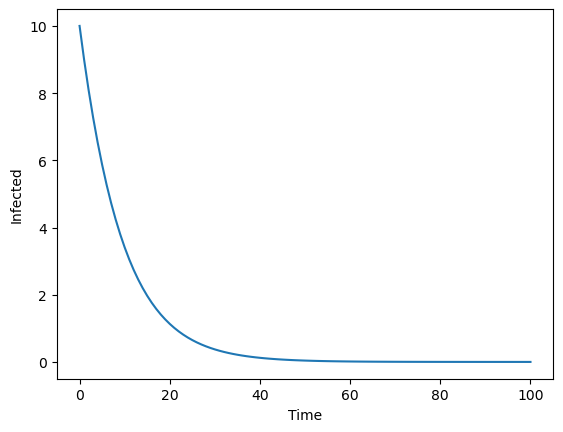

In [18]:
plt.Figure(figsize=(20,10))
plt.plot(tspan, I_sir_vac)
plt.xlabel("Time")
plt.ylabel("Infected")
plt.show()

## Solve by 'solve_ivp' instead of odeint

In [19]:
def SIR_ivp(t, y, param): # remember(t,y,param)
    S, I, R = y
    N, beta, gamma = param
    dSdt = - beta * S * I / N
    dIdt =   beta * S * I / N - gamma * I
    dRdt =  gamma * I
    return [dSdt, dIdt, dRdt]

In [20]:
from scipy.integrate import solve_ivp
sol_ivp = solve_ivp(fun=SIR_ivp, t_span=(t_0, t_end), y0=Init_sir, args=(param_sir,), t_eval = tspan) #solving with IVP

In [21]:
Tspan = sol_ivp.t 
S, I, R = sol_ivp.y

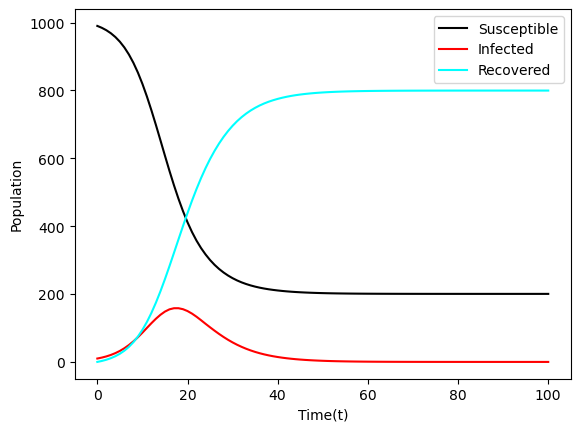

In [22]:
plt.Figure(figsize=(20,10))
plt.plot(Tspan, S, label="Susceptible",c='k')
plt.plot(Tspan, I, label="Infected",c='r')
plt.plot(Tspan, R, label="Recovered",c='cyan')
plt.xlabel("Time(t)")
plt.ylabel("Population")
plt.legend()
plt.savefig('C:\\Users\\madha\\OneDrive\\Desktop\\ForeML\\Class Figures\\sir_plot.png', dpi=300, bbox_inches='tight') 
plt.show()

## SIRS model differential equations
$$\begin{equation*}
\left\lbrace
\begin{aligned}
S'(t)  &= -\beta \frac{I}{N}S + \eta R, \quad S(0)  = S_0\\
I'(t)  &=  \beta \frac{I}{N}S - \gamma I, \quad I(0) = I_0\\
R'(t)  &= \gamma I - \eta R, \quad R(0) = R_0
\end{aligned}
\right.
\end{equation*}
$$

In [23]:
def SIRS_ode(y, t, param): # remember(y,t,param)
    S, I, R = y
    N, beta, gamma, eta = param
    dSdt = - beta * S * I / N + eta*R
    dIdt =   beta * S * I / N - gamma * I
    dRdt =  gamma * I - eta*R
    return [dSdt, dIdt, dRdt]

In [24]:
eta = 0.1 # set the value of alpha
param_sirs = [N, beta, gamma, eta]
Init_sirs = [S0, I0, R0]
soln_sirs = odeint(SIRS_ode, Init_sirs, tspan, args=(param_sirs,)) #solving with odeint
S_sirs, I_sirs, R_sirs = soln_sirs.T

## SEIR model differential equations
$$\begin{equation*}
\left\lbrace
\begin{aligned}
S'(t)  &= -\beta \frac{I}{N}S, \quad S(0)  = S_0\\
E'(t)  &=  \beta \frac{I}{N}S - \alpha E, \quad I(0) = I_0\\
I'(t)  &= \alpha E - \gamma I, \quad I(0)  = I_0\\
R'(t)  &= \gamma I, \quad R(0) = R_0
\end{aligned}
\right.
\end{equation*}
$$

In [25]:
def SEIR_ode(y, t, param): # remember(y,t,param)
    S, E, I, R = y
    N, beta, alpha, gamma = param
    dSdt = - beta * S * I / N
    dEdt =   beta * S * I / N - alpha * E
    dIdt =   alpha * E - gamma* I
    dRdt =  gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

In [26]:
alpha = 0.15 # set the value of alpha
param_seir = [N, beta, alpha, gamma]
E0 = 2.0 # initial value of E
Init_seir = [S0, E0, I0, R0]
soln_seir = odeint(SEIR_ode, Init_seir, tspan, args=(param_seir,)) #solving with odeint
S_seir, E_seir, I_seir, R_seir = soln_seir.T

## SEIRS model differential equations
$$\begin{equation*}
\left\lbrace
\begin{aligned}
S'(t)  &= -\beta \frac{I}{N}S + \eta R, \quad S(0)  = S_0\\
E'(t)  &=  \beta \frac{I}{N}S - \alpha E, \quad I(0) = I_0\\
I'(t)  &= \alpha E - \gamma I, \quad I(0)  = I_0\\
R'(t)  &= \gamma I -\eta R, \quad R(0) = R_0
\end{aligned}
\right.
\end{equation*}
$$

In [27]:
def SEIRS_ode(y, t, param): # remember(y,t,param)
    S, E, I, R = y
    N, beta, alpha, gamma,eta = param
    dSdt = - beta * S * I / N + eta*R
    dEdt =   beta * S * I / N - alpha * E
    dIdt =   alpha * E - gamma* I
    dRdt =  gamma * I -eta*R
    return [dSdt, dEdt, dIdt, dRdt]

In [28]:
param_seirs = [N, beta, alpha, gamma, eta]
Init_seirs = [S0, E0, I0, R0]
soln_seir = odeint(SEIRS_ode, Init_seirs, tspan, args=(param_seirs,)) #solving with odeint
S_seirs, E_seirs, I_seirs, R_seirs = soln_seir.T

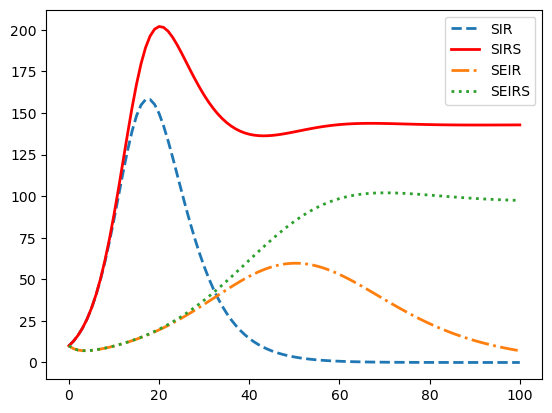

In [29]:
plt.plot(tspan, I_sir, label="SIR",lw=2, ls='--')
plt.plot(tspan, I_sirs, label = "SIRS",lw=2, c='r')
plt.plot(tspan, I_seir, label = "SEIR", lw=2, ls='-.')
plt.plot(tspan, I_seirs, label = "SEIRS", lw=2, ls='dotted')
plt.legend()
plt.savefig('C:\\Users\\madha\\OneDrive\\Desktop\\ForeML\\Class Figures\\All_plot.png', dpi=300, bbox_inches='tight')
plt.show()

### Parameter Estimation with SIR model

In [30]:
def SIR_odep(y, t, beta, gamma): # remember the pattern (y,t,param)
    S, I, R = y #split the states
    dSdt = - beta * S * I / N  # susceptible equation
    dIdt =   beta * S * I / N - gamma * I  # infected equation
    dRdt =   gamma * I  # recovered equation
    return [dSdt, dIdt, dRdt]

In [31]:
data = pd.read_csv("nation_level_daily.csv")[0:60] # 01 March to 06 August
Data = data['Total Confirmed']
I_data = np.array(Data, dtype=float)
I_data.shape

(60,)

In [32]:
N = round(1369003306/1000)	#Total population of India
I0 = I_data[0] # initial infect
R0  = 0.0;  # Initial recovered
S0 = N - (I0 + R0)  # inirial susceptible
Init_data = [S0, I0, R0] # Initial vector

In [33]:
#fit function with infected individual
def fit_odeint(t, beta, gamma):
    return integrate.odeint(SIR_odep, Init_data, t, args=(abs(beta), abs(gamma)))[:,1]

In [34]:
Time = np.linspace(0, len(I_data)-1, len(I_data)); # length equal to no. of data points
p0 = [0.4, 0.2] # initial beta and gamm value 
popt, pcov = optimize.curve_fit(fit_odeint, Time, I_data, p0=p0)
fitted = fit_odeint(Time, *popt)
print(f'Estimated beta is {popt[0]}')
print(f'Estimated gamma is {popt[1]}')

Estimated beta is 0.11774628868625994
Estimated gamma is 1.9759256182621515e-05


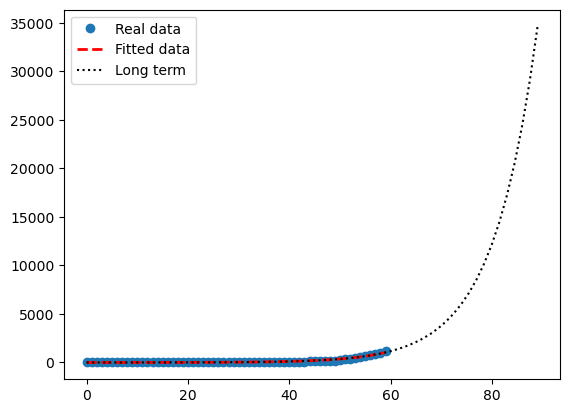

In [35]:
add_days = 30
Time_long = np.linspace(0, len(I_data) + add_days-1, len(I_data));
fitted_long = fit_odeint(Time_long, *popt)
plt.plot(Time, I_data,  'o', label="Real data")
plt.plot(Time, fitted, ls = 'dashed', lw = 2, label = "Fitted data", c='r')
plt.plot(Time_long, fitted_long, ls = 'dotted', label = "Long term", c= 'k')
plt.legend()
plt.savefig('C:\\Users\\madha\\OneDrive\\Desktop\\ForeML\\Class Figures\\Fit_SIR_plot.png', dpi=300, bbox_inches='tight')
plt.show()

### Networked SIR epidemic model

In [36]:
import networkx as nx

In [37]:
n = 10       # Number of nodes
k = 4        # Each node is connected to k nearest neighbors in ring topology
p = 0.3      # Probability of rewiring each edge
G = nx.watts_strogatz_graph(n, k, p)

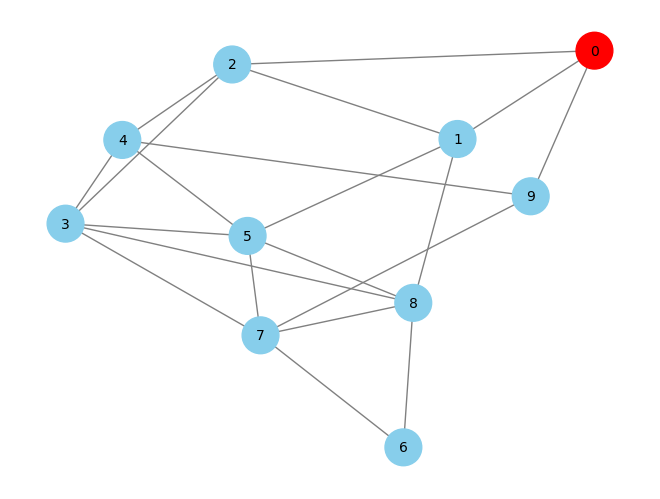

In [38]:
# Draw the graph using the spring layout
pos = nx.spring_layout(G, seed=42)  # Use spring layout
node_colors = ['red' if node == 0 else 'skyblue' for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_size=10, edge_color="gray")
plt.savefig('C:\\Users\\madha\\OneDrive\\Desktop\\ForeML\\Class Figures\\Graph_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [39]:
L = -nx.laplacian_matrix(G).toarray(); L = L.astype(np.double)
L

array([[-3.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1., -4.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
       [ 1.,  1., -4.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -5.,  1.,  1.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  1.,  1., -4.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  1., -5.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -2.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  1., -5.,  1.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  1., -5.,  0.],
       [ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0., -3.]])

In [40]:
def SIR_with_diffusion(y, t, param):
    N, beta, gamma, eps = param
    S, I, R = np.split(y, 3)  
    dSdt = -beta * S * I / N + eps*np.dot(L, S)  # sigma <- eps
    dIdt = beta * S * I / N - gamma * I + eps*np.dot(L, I)  
    dRdt = gamma * I + eps*np.dot(L, R)  
    return np.concatenate([dSdt, dIdt, dRdt])

In [41]:
Iv0 = np.zeros(n)  # Initial infected vector
Iv0[0] = I0  # source infection at node 0
Rv0 = np.zeros(n)  # Initial recovered vector
Sv0 = np.full(n, N) - I0 - R0  # Initial susceptible vector
Initv = np.concatenate([Sv0, Iv0, Rv0]) #whole initial vector
eps = 1e-5; # small diffusion rate
param_diff = [N, beta, gamma, eps]

In [42]:
sol_diff = odeint(SIR_with_diffusion, Initv, tspan, args=(param_diff,))
S_diff, I_diff, R_diff = np.split(sol_diff.T, 3) 

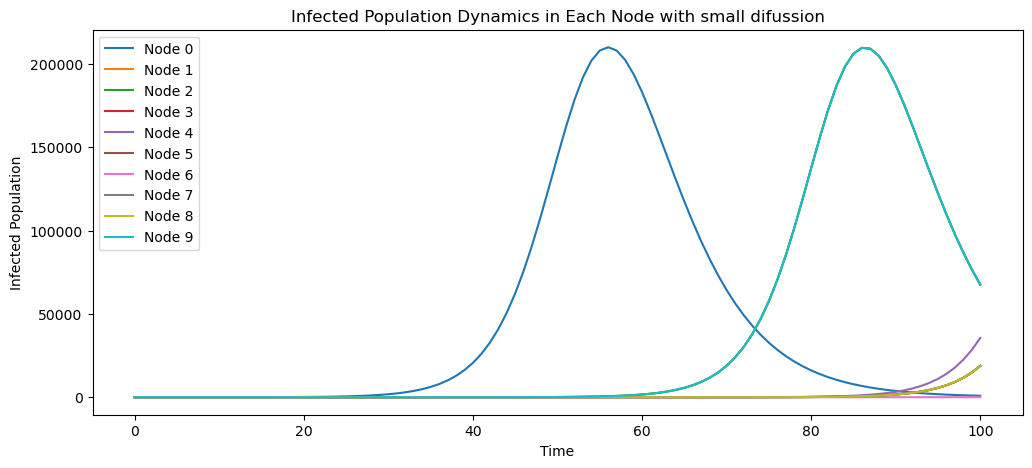

In [43]:
plt.figure(figsize=(12, 5))
for i in range(n):
    plt.plot(tspan, I_diff[i], label=f"Node {i}")
plt.title("Infected Population Dynamics in Each Node with small difussion")
plt.xlabel("Time")
plt.ylabel("Infected Population")
plt.legend()
plt.savefig('C:\\Users\\madha\\OneDrive\\Desktop\\ForeML\\Class Figures\\net_sir_small_plot.png', dpi=300, bbox_inches='tight')
plt.show()

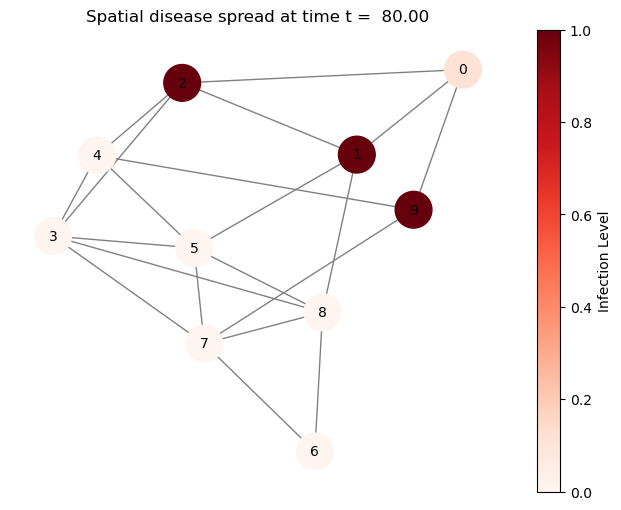

In [44]:
time_index = 80  
I_at_time = I_diff[:, time_index]
time = tspan[time_index]
node_colors = I_at_time / np.max(I_at_time) 
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])  # Set an empty array for the ScalarMappable
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Use spring layout for visualization
ax = plt.gca()  # Get current axes
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,  # Use infection levels for node color
    node_size=700,
    cmap=plt.cm.Reds,  # Use red color map for infection level
    font_size=10,
    edge_color="gray",
    ax=ax
)
plt.colorbar(sm, ax=ax, label='Infection Level')
plt.title(f"Spatial disease spread at time t =  {tspan[time_index]:.2f}")
plt.savefig('C:\\Users\\madha\\OneDrive\\Desktop\\ForeML\\Class Figures\\net_sir_small_t80_plot.png', dpi=300, bbox_inches='tight')

plt.show()

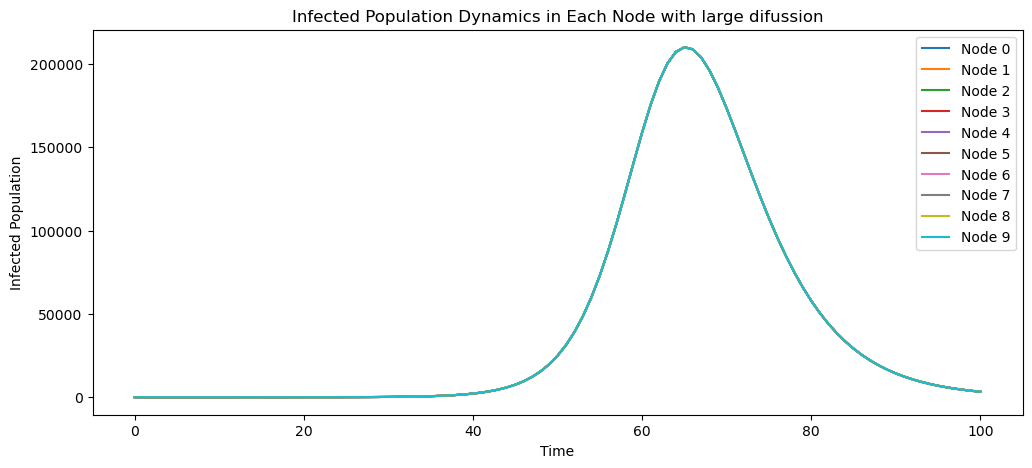

In [45]:
eps = 0.8
param_diff = [N, beta, gamma, eps]
sol_diff = odeint(SIR_with_diffusion, Initv, tspan, args=(param_diff,))
S_diff, I_diff, R_diff = np.split(sol_diff.T, 3) 
plt.figure(figsize=(12, 5))
for i in range(n):
    plt.plot(tspan, I_diff[i], label=f"Node {i}")
plt.title("Infected Population Dynamics in Each Node with large difussion")
plt.xlabel("Time")
plt.ylabel("Infected Population")
plt.legend()
plt.savefig('C:\\Users\\madha\\OneDrive\\Desktop\\ForeML\\Class Figures\\net_sir_large_plot.png', dpi=300, bbox_inches='tight')
plt.show()

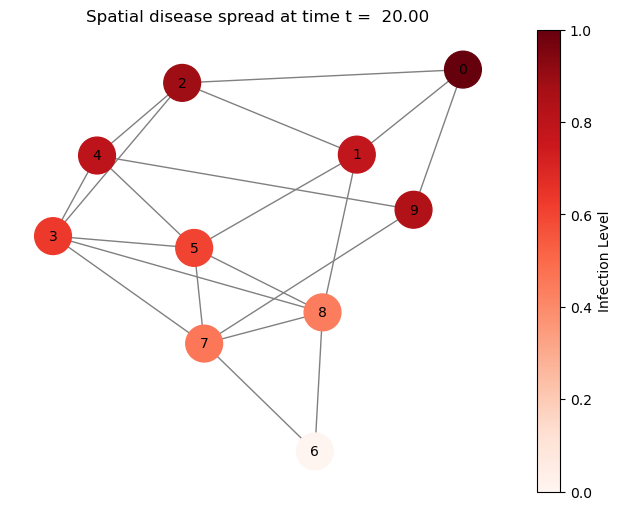

In [46]:
time_index = 20  
I_at_time = I_diff[:, time_index]
time = tspan[time_index]
node_colors = I_at_time / np.max(I_at_time) 
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])  # Set an empty array for the ScalarMappable
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Use spring layout for visualization
ax = plt.gca()  # Get current axes
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,  # Use infection levels for node color
    node_size=700,
    cmap=plt.cm.Reds,  # Use red color map for infection level
    font_size=10,
    edge_color="gray",
    ax=ax
)
plt.colorbar(sm, ax=ax, label='Infection Level')
plt.title(f"Spatial disease spread at time t =  {tspan[time_index]:.2f}")
plt.show()